In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3> <font color= "yellow">Define derivative using f(x+h) - f(x)/h</font></h3>

### 3x²-4x+5

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

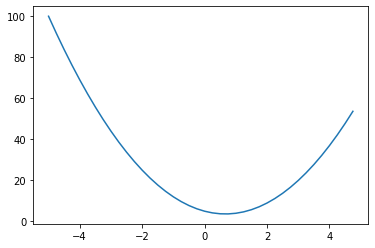

In [7]:
plt.plot(xs, ys)

In [8]:
h=0.000001
x = 3.0
f(x+h)

20.000014000003002

In [9]:
f(x+h) - f(x)

1.4000003002223593e-05

In [10]:
(f(x+h) - f(x))/h

14.000003002223593

<p> <font color= "yellow">More Complex</font></p>

In [11]:
# more complex
# inputs
a = 2.0
b = -3.0
c = 10.0
# single output d
d = a*b + c
print(d)

4.0


<h3> <font color= "yellow">Find derivative of d with respect to a b & c </font></h3>

<p> <font color= "yellow">Effect of a on the output and slope. Notice that differerentiating equation with respect to a, the slope becomes the value of b</font></p>

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


<p> <font color= "yellow">Effect of b on the slope and ouput. Notice that differerentiating equation with respect to b, the slope becomes the value of a </font></p>

In [13]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0002
slope:  2.0000000000042206


<p> <font color= "yellow">Effect of c on the output and slope. This will just increase the ouput by the value of c</font></p>

In [14]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


<h3> <font color= "yellow">Value class in micrograd</font></h3>

In [25]:
class Value:
    
                                    #  _children is a tuple, then we will convert in to a set, it will help us find the children values
                                    # inititialize _op as an empty set, it will help us find the operation that made the childen value
                                    # we added a labed for visualizing assistance
                                    # a variable that maintains the derivative of L with repect to that value (self.grad=0), initially it will be zero
                                    # so at innitialization we are assuming that every value does not impact the output cuz if the gradient is zero that means that changing this variable is not changing the loss Function L


    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0              # affection of this value to the output
                                     # which lead to this result
        self._prev = set(_children)  #  prev will be the empty set, # children variable keeps track of the values
        self._op = _op               # keeps track of the operations
        self.label = label           # for visualization purposes
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    
    def __add__(self, other):       # have to use def __add__ to add objects   # feed in the children of this ._prev value. (self, other) are the children                         
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):       # what to do if two value objects are multiplied
        return Value(self.data * other.data, (self, other), '*')
    
                                    #  exponentiation function tanh, we could return x of a value instead of a tanh of the value
                                    # we'd be able to create tanh if we knew how to exp
                                    # tanh x= (sinh x /cosh x) = (e^(2x) - 1) / (e^(2x) + 1)
                                    # (self, ) -> children of this node, ther's just one child
    def tanh(self):                 # implementing the tanh function
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh')
        return out
    


In [26]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = f * d; L.label='L'         # L is the output of the graph, L is the value of forward pass (-8)
print(f'a: {a}, b: {b}, c: {c}, d: {d}, e: {e}, f: {f}, L: {L}')

a: Value(data=2.0), b: Value(data=-3.0), c: Value(data=10), d: Value(data=4.0), e: Value(data=-6.0), f: Value(data=-2.0), L: Value(data=-8.0)


In [32]:
d._prev
# {Value(data=-6.0), Value(data=10)} results from a * b and the c value
# {Value(data=-6.0), Value(data=10)} are the children values

{Value(data=-6.0), Value(data=10)}

<h3> <font color= "yellow">Visualization</font></h3>

## Visualize it `Tommy`

In [6]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
          nodes.add(v)
          for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
      uid = str(id(n))
      # for any value in the graph, create a rectangular ('record') node for it
      dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
      if n._op:
        # if this value is a result of some operation, create an op node for it
        dot.node(name = uid + n._op, label = n._op)
        # and connect this node to it
        dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
      # connect n1 to the op of n2
      dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot
    

grad is representing the derivative of the output, in this case L, with respect to the value it is attached to, eg grad 0.0000000 with respect to c

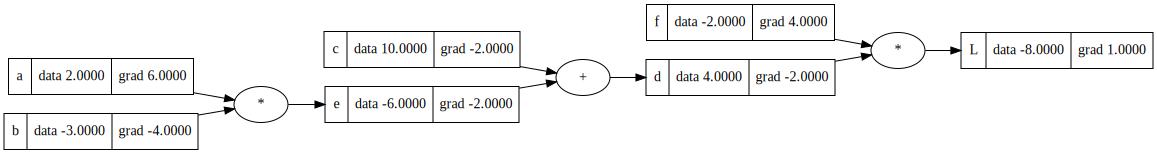

In [47]:
draw_dot(L)

# Determination of the gradient

In [51]:
# try to make L go up, we just need to go in the direction of the gradient
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
# L is the output of the graph, L is the value of forward pass (-8)
L = f * d

print(L.data)

-7.286496


# Manual Back Propagation Example 1

We want to know the derivation of L with respect to d and also f (to get dL/dd and dL/df)

L = d * f

(partial differentiation)

dL/dd = ? f 

dL/df = L



<br/>

As we move further left, we need to know the derivative of L with respect to c and also e

dL / dc = ?

We need to find out how c impacts L

what is the derivative of d with respect to c

d = c + e

(partial differentiation)

dd / dc = ? 1

dd / de = ? 1


What we actually want is dL/dc

we know how L impacts d and now we know how c and e impact d

how do we put that info together to write dL/dc? and the answer is the CHAIN RULE

CHAIN RULE: 
dy/dx = dy/du * du/dx

in short, we just multiply the derivatives

KNOW: 
dL / dd = -2
dd / dc = 1
dd / de = 1

WANT: 
dL/dc
dL/de

dL / dc = (dL / dd) * (dd / dc)
dL / de = (dL / dd) * (dd / de)

so dL/dc = -2 x 1 = -2.0
   dL/de = -2 x 1 = -2.0



<br/>

Now on to the last one

we wanna find the derivative of L with respect to a

dL / da = ?

e = a * b

de / da = ? b = -3
de / db = ? a = 2

we'll also use chain rule here

KNOW:
dL / de = -2.0

WANT:
dL/ da = ?
    CHAIN RULE:
        dL/da = (dL / de) * (de / da)
        dL/db = (dL / de) * (de / db)
        
 so dL / da = -2.0 x -3 = 6
    dL / db = -2.0 x 2.0 = -4


In [41]:
# this is our first grad that we found by getting the derivative of L with respect to L
L.grad = 1.0      # derivation of L with respect to L
f.grad = 4.0      # derivation of L with respect to f, the answer is d, from(L = d * f)
d.grad = -2       # derivation of L with respect to d, the answer id f, from(L = d * f)
c.grad = -2       # derivation of L with respect to c, we used chain rule     dL / dc = (dL / dd) * (dd / dc)
e.grad = -2       # derivation of L with respect to e, we used chain rule     dL / de = (dL / dd) * (dd / de)
a.grad = 6        # derivation of L with respect to a, we used chain rule      dL/da = (dL / de) * (de / da)
b.grad = -4       # derivation of L with respect to e, we used chain rule     dL/db = (dL / de) * (de / db)


We start from the end (right), we're interested to fill in the gradient.

What is the derivative of L with respect to L. It is one because if you add a small amount like 0.0001, the value of L will increase by 0.0001

This tells us that it is directly proportional

to prove the derivation, we can add + h to that number we are deriving in rspect of eg.  f = Value(-2.0+h). It should print the derivative of L with respect to f

In [50]:
# the reason we're defining a function is so that we don't mess up the global variables above
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    # L is the output of the graph, L is the value of forward pass (-8)
    L = f * d; L.label='L'
    L1 = L.data #L is a value node so we want it's data, hence L.data instead of L
    
    a = Value(2.0, label='a') # adding h will be measuring the derivative of L with respect to a
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    # L is the output of the graph, L is the value of forward pass (-8)
    L = f * d; L.label='L'
    L2 = L.data
    
    #this should print the derivative of L with respect to a because L is the one we added a bit by h
    print((L2-L1)/h) #L2-L1 is how much L changed and then noarmalize it by h
lol()
    

-3.9999999999995595


# Manual Propagation Example 2

## Intro to Neurons

A quick intro to neurons and its basic biological and mathematical modelling can be found on the [cs231n Lecture Page](https://cs231n.github.io/neural-networks-1/) by Stanford university.

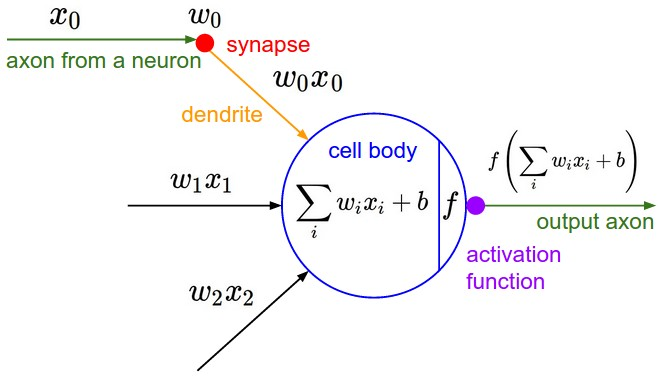

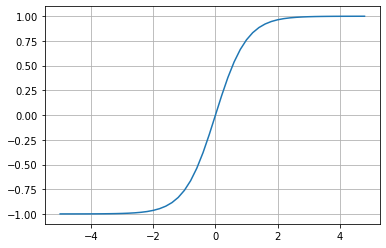

In [33]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

As shown the ``tanh`` function squashes a given input inbetween $-1.0$ and $1.0$. Also see [Hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions)

## Implementing and Breaking up `tanh()`

$$\tanh{x} = \frac{e^{2x}-1}{e^{2x}+1}$$

Two dimensional neuron - two inputs are gonna come in

we're trying to add x1w1 and x2w2 and add the bias i.e x1w1 + x2w2 + b

n is the body without the activation function

In [51]:
                                        # inputs x1, x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

                                        # weights of thiseuron
                                        # weights w1, w2  - they are the sybaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

                                        # b is the bias of the neuron
b = Value(6.8813735870195432, label='b')

                                        # x1w1 + x2w2 + b is what we wanna do
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

                                        # n is the body without the activation function
n = x1w1x2w2 + b; n.label = 'n'

                                        # ouput -> it's going to return the tanh output of n
o = n.tanh(); o.label = 'o'

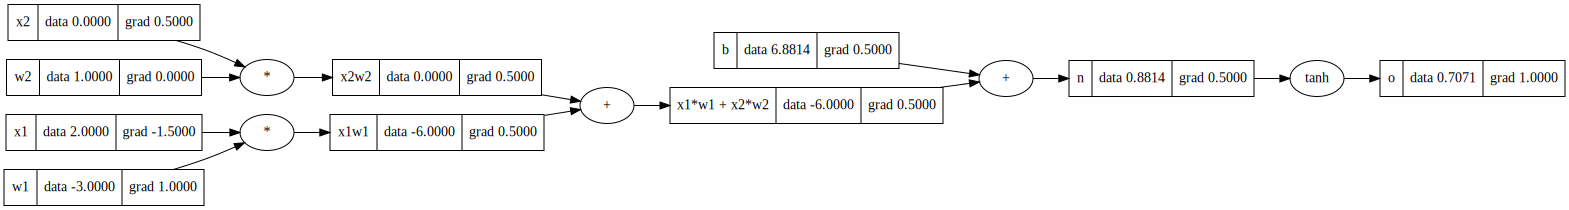

In [58]:
draw_dot(o)

Let's find out what is the derivative o, in respect to all the input here, what we care most is the derivative of these neurons on the weights, specifically, w2 and w1

In [57]:
o.grad = 1.0                   # derivation of o with respect to o
n.grad = 0.5                   # derivation of 0 with respect to n through tanh. do/dn = 1-tanh(n)^2  |   o = tanh(n)  |   do/dn = 1-o^2   |   o = 0.7071  |  1-0.7071^2 = 0.5
b.grad = 0.5                   # derivation of o with respect to b, we use chain rule  |   do/db = d0/dn * dn/db  |   n = x1w1x2w2 + b  |  dev of n with respect to b   |   dn/db = 1  |    0.5*1 = 0.5
x1w1x2w2.grad = 0.5            # derivation of o with respect to x1w1x2w2, we use chain rule  |   do/x1w1x2w2 = d0/dn * dn/dx1w1x2w2  |   n = x1w1x2w2 + b  |  dev of n with respect to x1w1x2w2  |   dn/dx1w1x2w2 = 1  |    0.5*1 = 0.5
                               # N/B where there's a plus, the derivative is similar to the previous one
x1w1.grad = 0.5                # derivation of o with respect to x1w1  |  It's just similar to the above because we have a plus sign
x2w2.grad = 0.5                # derivation of o with respect to x2w2  |  It's just similar to the above because we have a plus sign

x2.grad = w2.data * x2w2.grad  # here we have basically shortened the chain rule |  
w2.grad = x2.data * x2w2.grad  # here we have basically shortened the chain rule | do/dw1 = d0/x1w1 * dx1w1/dw1

x1.grad = w1.data * x1w1.grad  # here we have basically shortened the chain rule | 
w1.grad = x1.data * x1w1.grad  # here we have basically shortened the chain rule | 